In [1]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
x_train, x_test, y_train = data_functions.get_dataframes()

^C


In [3]:
#x_train.drop(["wpt_name", "date_recorded", "funder",'recorded_by', "installer", "subvillage", "public_meeting", "scheme_management",'num_private', "scheme_name",'extraction_type','extraction_type_class', "permit"], axis=1, inplace= True)

In [4]:
#x_train.head()

In [4]:
x_train.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

x_test.drop(['date_recorded','installer','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], inplace=True, axis=1)

In [5]:
x_train_nums= x_train.select_dtypes(exclude="object")
x_train_cat= x_train.select_dtypes(include="object")

In [6]:
x_train_cat.shape

(59400, 11)

In [7]:
x_train_cat.isna().sum()

basin                    0
region                   0
lga                      0
extraction_type_group    0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source_type              0
waterpoint_type          0
dtype: int64

In [9]:
#si=SimpleImputer()
#x_train_cat_si= pd.DataFrame(si.fit_transform(x_train_cat), index=x_train_cat.index, columns=x_train_cat.columns)
#x_train_cat_si


In [8]:
ohe=OneHotEncoder(sparse= False)

In [9]:
x_train_ohe=pd.DataFrame(ohe.fit_transform(x_train_cat), columns= ohe.get_feature_names(x_train_cat.columns), index= x_train_cat.index)
sum(x_train_ohe.isna().sum())

0

In [10]:
x_train_ohe.shape

(59400, 213)

In [11]:
x_train_nums['construction_year'].head()

id
69572    1999
8776     2010
34310    2009
67743    1986
19728       0
Name: construction_year, dtype: int64

In [12]:
type(x_train_nums['construction_year'])

pandas.core.series.Series

In [13]:
si=SimpleImputer()
x_nums_si=pd.DataFrame(si.fit_transform(x_train_nums), index= x_train_nums.index, columns= x_train_nums.columns)

In [14]:
scale= StandardScaler()
x_train_nums_scaled= pd.DataFrame(scale.fit_transform(x_nums_si), index= x_nums_si.index, columns= x_nums_si.columns)
x_train

,amount_tsh,gps_height,basin,region,lga,population,construction_year,extraction_type_group,payment_type,water_quality,quality_group,quantity,quantity_group,source_type,waterpoint_type
id,,,,,,,,,,,,,,,
69572,6000.0,1390,Lake Nyasa,Iringa,Ludewa,109,1999,gravity,annually,soft,good,enough,enough,spring,communal standpipe
8776,0.0,1399,Lake Victoria,Mara,Serengeti,280,2010,gravity,never pay,soft,good,insufficient,insufficient,rainwater harvesting,communal standpipe
34310,25.0,686,Pangani,Manyara,Simanjiro,250,2009,gravity,per bucket,soft,good,enough,enough,dam,communal standpipe multiple
67743,0.0,263,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,1986,submersible,never pay,soft,good,dry,dry,borehole,communal standpipe multiple
19728,0.0,0,Lake Victoria,Kagera,Karagwe,0,0,gravity,never pay,soft,good,seasonal,seasonal,rainwater harvesting,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210,Pangani,Kilimanjaro,Hai,125,1999,gravity,per bucket,soft,good,enough,enough,spring,communal standpipe
27263,4700.0,1212,Rufiji,Iringa,Njombe,56,1996,gravity,annually,soft,good,enough,enough,river/lake,communal standpipe
37057,0.0,0,Rufiji,Mbeya,Mbarali,0,0,swn 80,monthly,fluoride,fluoride,enough,enough,borehole,hand pump


In [15]:
x_final= x_train_nums_scaled.join(x_train_ohe)

In [16]:
x_final.head()

,amount_tsh,gps_height,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,1.895665,1.041252,-0.150399,0.733857,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8776,-0.105970,1.054237,0.212290,0.745416,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34310,-0.097630,0.025541,0.148660,0.744365,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
67743,-0.105970,-0.584751,-0.258570,0.720196,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19728,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
x_final.shape

(59400, 217)

In [18]:
x_val, x_val_test, y_val, y_val_test= train_test_split(x_final, y_train, random_state=2020)

In [19]:
bin_y = lambda x: 1 if x == 'functional' else 0
y_tr_final = y_val['status_group'].apply(bin_y)
y_te_final = y_val_test['status_group'].apply(bin_y)

In [20]:
#from imblearn.over_sampling import SMOTE
#sm1 = SMOTE(random_state=2020)

In [21]:
#y_val_train=np.array(y_val)
#y_val_tr=y_val_train.ravel()
#y_val_tr.shape

In [22]:
#X_tr_sm, y_tr_sm = sm1.fit_resample(x_val,y_val_tr)

In [23]:
#X_tr_sm.shape

In [24]:
#y_tr_sm.shape

In [25]:
#from sklearn.linear_model import LogisticRegression

In [26]:
y_tr_final.value_counts()
x_val

,amount_tsh,gps_height,population,construction_year,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
41434,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47577,0.294357,0.807523,0.997056,0.737010,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55982,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25879,-0.105970,0.412204,0.042611,0.738060,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13900,-0.105970,-0.964200,-0.381587,-1.366788,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43021,-0.105970,1.840547,-0.063439,0.718094,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49821,-0.105970,1.230255,-0.169488,0.725450,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2983,-0.105970,-0.964200,-0.381587,-1.366788,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
rf=RandomForestClassifier()
rf.fit(x_val,y_tr_final)
y_pred_rf_1=rf.predict(x_val_test)

In [28]:
print(classification_report(y_te_final, y_pred_rf_1))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6840
           1       0.80      0.85      0.82      8010

    accuracy                           0.80     14850
   macro avg       0.80      0.80      0.80     14850
weighted avg       0.80      0.80      0.80     14850



In [29]:
from sklearn.metrics import plot_confusion_matrix

In [31]:
import matplotlib.pyplot as plt

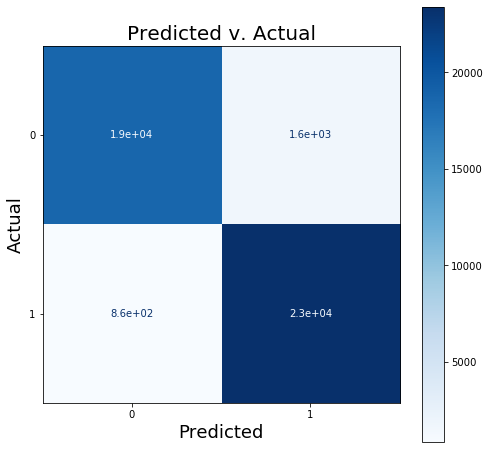

In [35]:
fig, ax= plt.subplots(figsize=(8,8))
plot_confusion_matrix(rf, x_val, y_tr_final, ax = ax, cmap=plt.cm.Blues)
plt.title('Predicted v. Actual', fontsize = 20)
ax.grid(False)
plt.xlabel('Predicted', fontsize = 18)
plt.ylabel('Actual', fontsize = 18)
plt.show()


In [27]:
#params = {'max_depth': [5,10,25],
 #   'min_samples_split': [3,5,7],
  #  'max_features': ['sqrt', 0.5],
   # 'n_estimators': [50, 100, 200]}

In [40]:
#rf_1_grid_search=GridSearchCV(rf,params,cv=3)


In [41]:
#rf_1_grid_search.fit(x_val, y_tr_final)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 25], 'min_samples_split': [3, 5, 7], 'max_features': ['sqrt', 0.5], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
#y_train_sm=pd.DataFrame(y_tr_sm)

In [63]:
#x_train_sm=pd.DataFrame(X_tr_sm)

In [42]:
rf_1_grid_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 7,
 'n_estimators': 200}

In [28]:
rf_2=RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_split=7, n_estimators=200)

In [29]:
rf_2.fit(x_val,y_tr_final)
y_pred_rf_2=rf.predict(x_val_test)

In [59]:
type(y_val_test)

pandas.core.frame.DataFrame

In [46]:
print(classification_report(y_te_final, y_pred_rf_2))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6840
           1       0.80      0.83      0.81      8010

   micro avg       0.80      0.80      0.80     14850
   macro avg       0.80      0.79      0.80     14850
weighted avg       0.80      0.80      0.80     14850



In [47]:
print(classification_report(y_te_final, y_pred_rf_1))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6840
           1       0.80      0.83      0.81      8010

   micro avg       0.80      0.80      0.80     14850
   macro avg       0.80      0.79      0.80     14850
weighted avg       0.80      0.80      0.80     14850



In [50]:
rf.score(x_val, y_tr_final)

0.9350841750841751

In [52]:
rf.score(x_val_test, y_te_final)

0.7969023569023569

In [53]:
rf_2.score(x_val,y_tr_final)

0.8776879910213243

In [54]:
rf_2.score(x_val_test,y_te_final)

0.8061279461279461

In [58]:
import matplotlib.pyplot as plt

NameError: name 'features' is not defined

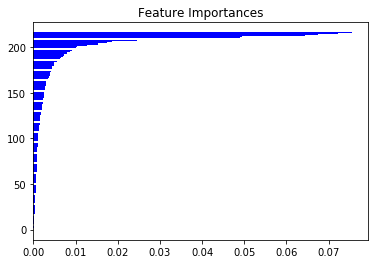

In [59]:
importances = rf_2.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')